In [26]:
import pandas as pd


In [27]:
output_data = pd.read_excel('output.xlsx')
output_data

,Order Date,Order Time,Unnamed: 2,Customer Name,Contact,Customer Address,Order Items,Order Quantity
0,02/22/2021,06:56:07 PM,NaN,MD Al amin,1797486751,"JESSORE CANTONMENT, JEESSORE, JESSORE, KHULNA",Decorative Wall Clock - Black - 1021,1
1,02/20/2021,01:43:32 AM,NaN,Abu Raihan Tusar,1671970463,"107/2,Tarowa,Narsingdi Sadar,Narsingdi, Narsin...",Decorative Wall Clock- Black - 1026,1
2,02/17/2021,06:55:17 PM,NaN,Md Mushfiq,1782469005,"Mohadevpur, Mohadevpur, Naogaon, Mohadevpur",Decorative Wall Clock - Black - 1017,1
3,03/18/2021,11:11:06 PM,NaN,Nazrul Islam,1718017500,"Lt cdr Nazrul, Bangladesh Naval Academy, Poten...",Decorative Wall Clock - Black - 1033,1
4,01/10/2021,12:40:50 AM,NaN,A F M Shamimuzzaman,1737906264,"Road: 04, Block: C, House: 08, Flat: 4C, Kader...",Decorative Wall Clock - Black - 1029,1
5,03/15/2021,03:55:38 AM,NaN,A H M TAUFEQUR RAHMAN,1707039144,"Taufeq rahman, susena super store,ka/78 Joar s...",Decorative Wall Clock - Black - 1033,1
6,03/14/2021,08:17:09 PM,NaN,A S M MURSHEDUL ISLAM,1550041077,"A S M MURSHEDUL ISLAM, 157/N distrilary road,...",Decorative Wall Clock - Black - 1037,1


In [28]:
sum(output_data['Order Quantity'])

7

In [29]:
customer_name = output_data['Customer Name']
customer_contact = output_data['Contact']
customer_address = output_data['Customer Address']
order_items = output_data['Order Items']
order_quantity = output_data['Order Quantity']
order_date = output_data['Order Date']
order_time = output_data['Order Time']

In [30]:
customer_name = list(customer_name)
customer_contact = list(customer_contact)
customer_address = list(customer_address)
order_items = list(order_items)
order_date = list(order_date)
order_time = list(order_time)
order_quantity = list(order_quantity)

In [31]:
order_times = []
for time in order_time:
    order_times.append(time.split(' ')[0])

order_times

['06:56:07',
 '01:43:32',
 '06:55:17',
 '11:11:06',
 '12:40:50',
 '03:55:38',
 '08:17:09']

In [32]:
order_dates = []
for date in order_date:
    order_d = date.split('/')
    order_dates.append(order_d[2]+'-'+order_d[1]+'-'+order_d[0])

order_dates

['2021-22-02',
 '2021-20-02',
 '2021-17-02',
 '2021-18-03',
 '2021-10-01',
 '2021-15-03',
 '2021-14-03']

In [33]:
date_created = []
for i in range (len(order_dates)):
    date_created.append(order_dates[i]+'T'+order_times[i])
date_created

['2021-22-02T06:56:07',
 '2021-20-02T01:43:32',
 '2021-17-02T06:55:17',
 '2021-18-03T11:11:06',
 '2021-10-01T12:40:50',
 '2021-15-03T03:55:38',
 '2021-14-03T08:17:09']

In [34]:
order_items

item_list = pd.read_csv('clock list.csv')

item_id = list (item_list['ID'])
item_sku = list (item_list['SKU'])
items = dict (zip(item_sku,item_id))


item_index_no = []
for index in range(len(order_items)):
    if order_items[index] in item_sku:
        item_index_no.append(items[order_items[index]])
item_index_no

[]

In [35]:
customer_name
customer_email = []
for email in customer_name:
    email = email.strip()
    email = email.replace(' ','.')
    email = email.replace('..','.')
    email = email.replace('..','.') + '@gmail.com'
    customer_email.append(email.lower())
customer_email

['md.al.amin@gmail.com',
 'abu.raihan.tusar@gmail.com',
 'md.mushfiq@gmail.com',
 'nazrul.islam@gmail.com',
 'a.f.m.shamimuzzaman@gmail.com',
 'a.h.m.taufequr.rahman@gmail.com',
 'a.s.m.murshedul.islam@gmail.com']

In [36]:
import matplotlib.pyplot as plt

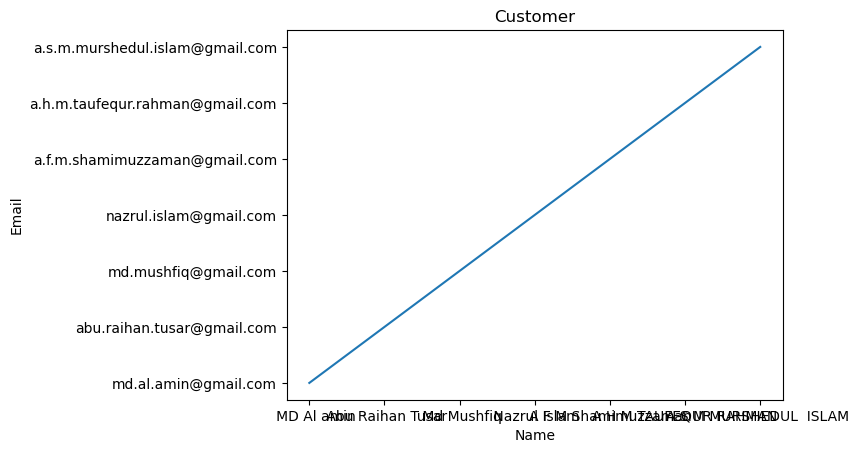

In [37]:
plt.plot(customer_name,customer_email)
plt.xlabel('Name')
plt.ylabel('Email')
plt.title('Customer')
plt.show()

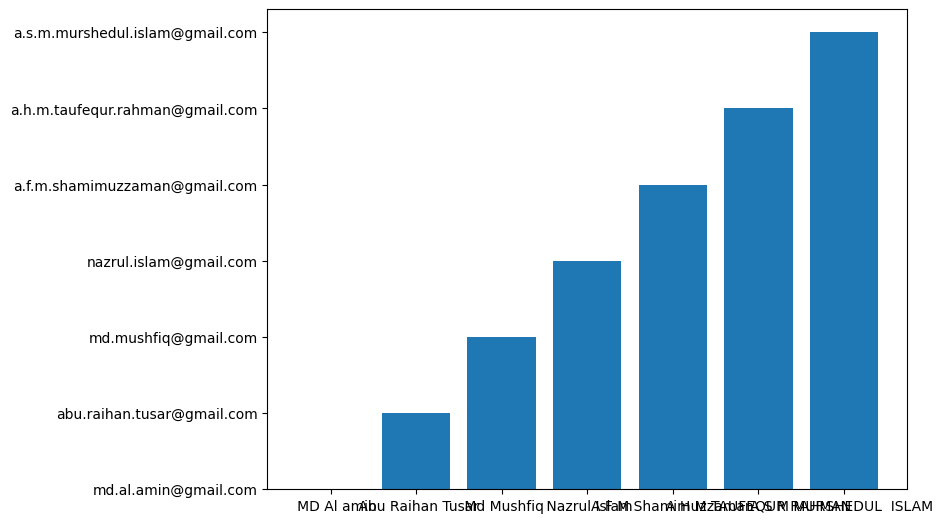

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(customer_name,customer_email)
plt.show()

In [15]:
from datetime import datetime
import requests
import json

wordpress_url = 'https://'
consumer_key = ''
consumer_secret = ''
api_endpoint = f'{wordpress_url}/wp-json/wc/v3/orders'

In [ ]:
for order in range(len(customer_name)):
    order_data = {
        'payment_method': 'bacs',
        'payment_method_title': 'Bank Transfer',
        'set_paid': True,
        'billing': {
            'first_name': customer_name[order],
            'last_name': '',
            'address_1': customer_address[order],
            'city': '',
            'state': '',
            'postcode': '',
            'country': 'BD',
            'email': 'guest@deshicrafts.com',
            'phone': '+880'+ str(customer_contact[order])
        },
        'shipping': {
            'first_name': customer_name[order],
            'last_name': '',
            'address_1': customer_address[order],
            'city': '',
            'state': '',
            'postcode': '',
            'country': 'BD',
            'phone': '+880'+ str(customer_contact[order])
        },
        'line_items': [
            {
                'product_id': item_index_no[order],
                'quantity': order_quantity[order]
            }
        ],
         'date_created': '2021-01-12T12:00:00',
    }
    

    order_data["date_created"] = datetime.strptime(order_data["date_created"], "%Y-%m-%dT%H:%M:%S").isoformat()
    auth = requests.auth.HTTPBasicAuth(consumer_key, consumer_secret)
    
    response = requests.post(api_endpoint, auth=auth, headers={'Content-Type': 'application/json'}, data=json.dumps(order_data))

    if response.status_code == 201:
        print(f"Order created successfully. Order ID: {response.json()['id']}")
    else:
        print(f"Failed to create order. Status code: {response.status_code}, Response: {response.text}")
